### Some definitions

- <i>Experiment</i> is a procedure, or random process that yields one outcome out of all the possible outcomes of the experiment. Some examples of experiments are:
  - Rolling a die
  - Counting the number of empty slots in a Biki stand
  - Measuring the weight of a shark that was captured
  - The number of bleached corals at a given spot
<br/>  


### Sample Space

- <i>Sample Space S</i> is the exhaustive set of all possible, disjoint outcomes of an experiment
  - When rolling a die, its the finite set ${1, 2, 3, 4, 5, 6}$
  - When counting the number of empty slots in a Biki stand, it's a value greater or equal to 0 less than or equal to the total number of slots available.
  - When weighing patients in a hospital, it's the continuous infinite set [0.X, 1000] pounds


#### Sample Space - Cont'd

- When sampling from a uniform range [0,99], the sample space consists of all the integers in that range.
    
- Exploring the sample space for some common discrete experiment requires enumerating (or counting) all possibilities  
  - Many counting problems involve understanding and being able to compute __permutations__ and __combination__
  - In trivial cases, you can simulate the space of all possible events and subsequently compute the probability of an event.
 
- Ex. What is the probability of guessing someone's 4 digit PIN in the first try.
  - What is the sample space?
- What is the probability of guessing someone's 4 digit PIN in the first try if they tell you that their PIN does not contain any repeated digits
  - What is the sample space?

#### Event

- In an experiment, an <i>avent E</i> represents a subset of the sample space
  - The die lands 4
  - The die lands on an odd side (1, 3 or 5)
  - The number of empty Biki slots is 0
  - The weight of a patient is greater than 140 Kgs but less than 200 Kgs


#### Probability

* Probabilities quantify beliefs
  * The are used to measure uncertainty of an event.
* Ex:
  * How likely is a person to contract the flu this season?
  * How likely is it to have a coral bleaching event
 
- Intuitively, we talk of a `null` (0) probability when we know an event is not possible, and a probability of 1 if an event is certain.

- Formally, probability is a number that quantifies the likelihood of an event and which satisfies the following two properties:
 
 $~~~~~~~~~~~~~~0 <= p(s) <= 1$$~~~~~~~~~~~~\text{and}~~~~~~~~ \sum\limits_{s \in S}{p(s) = 1}$

### Long run frequencies of events

- The concept of long-term is an essential aspect of probability
  - In a casino game where your chances of winning are 1 in 4, you are not guaranteed to win if you participate four, 8 or even 20 times
 

- When flipping a coin -- assuming the coin is unbiased -- we would intuitively expect to observe `in the long run` as many heads as tails, or about 50% heads and 50% tails.
  - The probabilities of heads and tails are $p(H)=0.5$ and $p(T)=0.5$ respectively
 
 
- We can prove this computationally by generating heads (ones) and tails (zeros) using the `R`.

In [1]:
sample(c(0, 1), size=10, replace=TRUE, prob=c(0.5, 0.5))

[1] 0 1 1 0 0 1 0 0 0 0

### Long run Frequency of Coin Flip Experiment

* The progression of the number of heads after each iteration can be obtained using the cumulative sum (or `cumsum`).

* The cumulative sum for an element at position $a$, where $a > 1$ of an array $X$ is:$~~\sum_0^a X[a]$

* The `cumsum()` function provides the cumulative sum of a vector 

In [2]:
coin_flips = sample(c(0, 1), size=20, replace=TRUE, prob=c(0.5, 0.5))
coin_flips
cumsum(coin_flips)


[1] 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0

[1]  0  0  1  2  2  3  4  4  4  5  6  7  7  8  8  9  9 10 11 11

In [3]:
coin_flips = sample(c(0, 1), size=20, replace=TRUE, prob=c(0.5, 0.5))
coin_flips
cumsum(coin_flips)
round(cumsum(coin_flips) / 1:20, 2)

[1] 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1

[1] 0 0 0 0 0 1 1 1 1 2 2 2 3 3 3 3 3 4 4 5

[1] 0.00 0.00 0.00 0.00 0.00 0.17 0.14 0.12 0.11 0.20 0.18 0.17 0.23 0.21 0.20
[16] 0.19 0.18 0.22 0.21 0.25

In [7]:
coin_flips = sample(c(0, 1), size=100000, replace=TRUE, prob=c(0.5, 0.5))
coin_flips_c_sum = cumsum(coin_flips)
coin_flips_c_sum_norm = coin_flips_c_sum / 1:100000


In [8]:
library(tidyverse)

In [9]:
length(coin_flips_c_sum)

[1] 100000

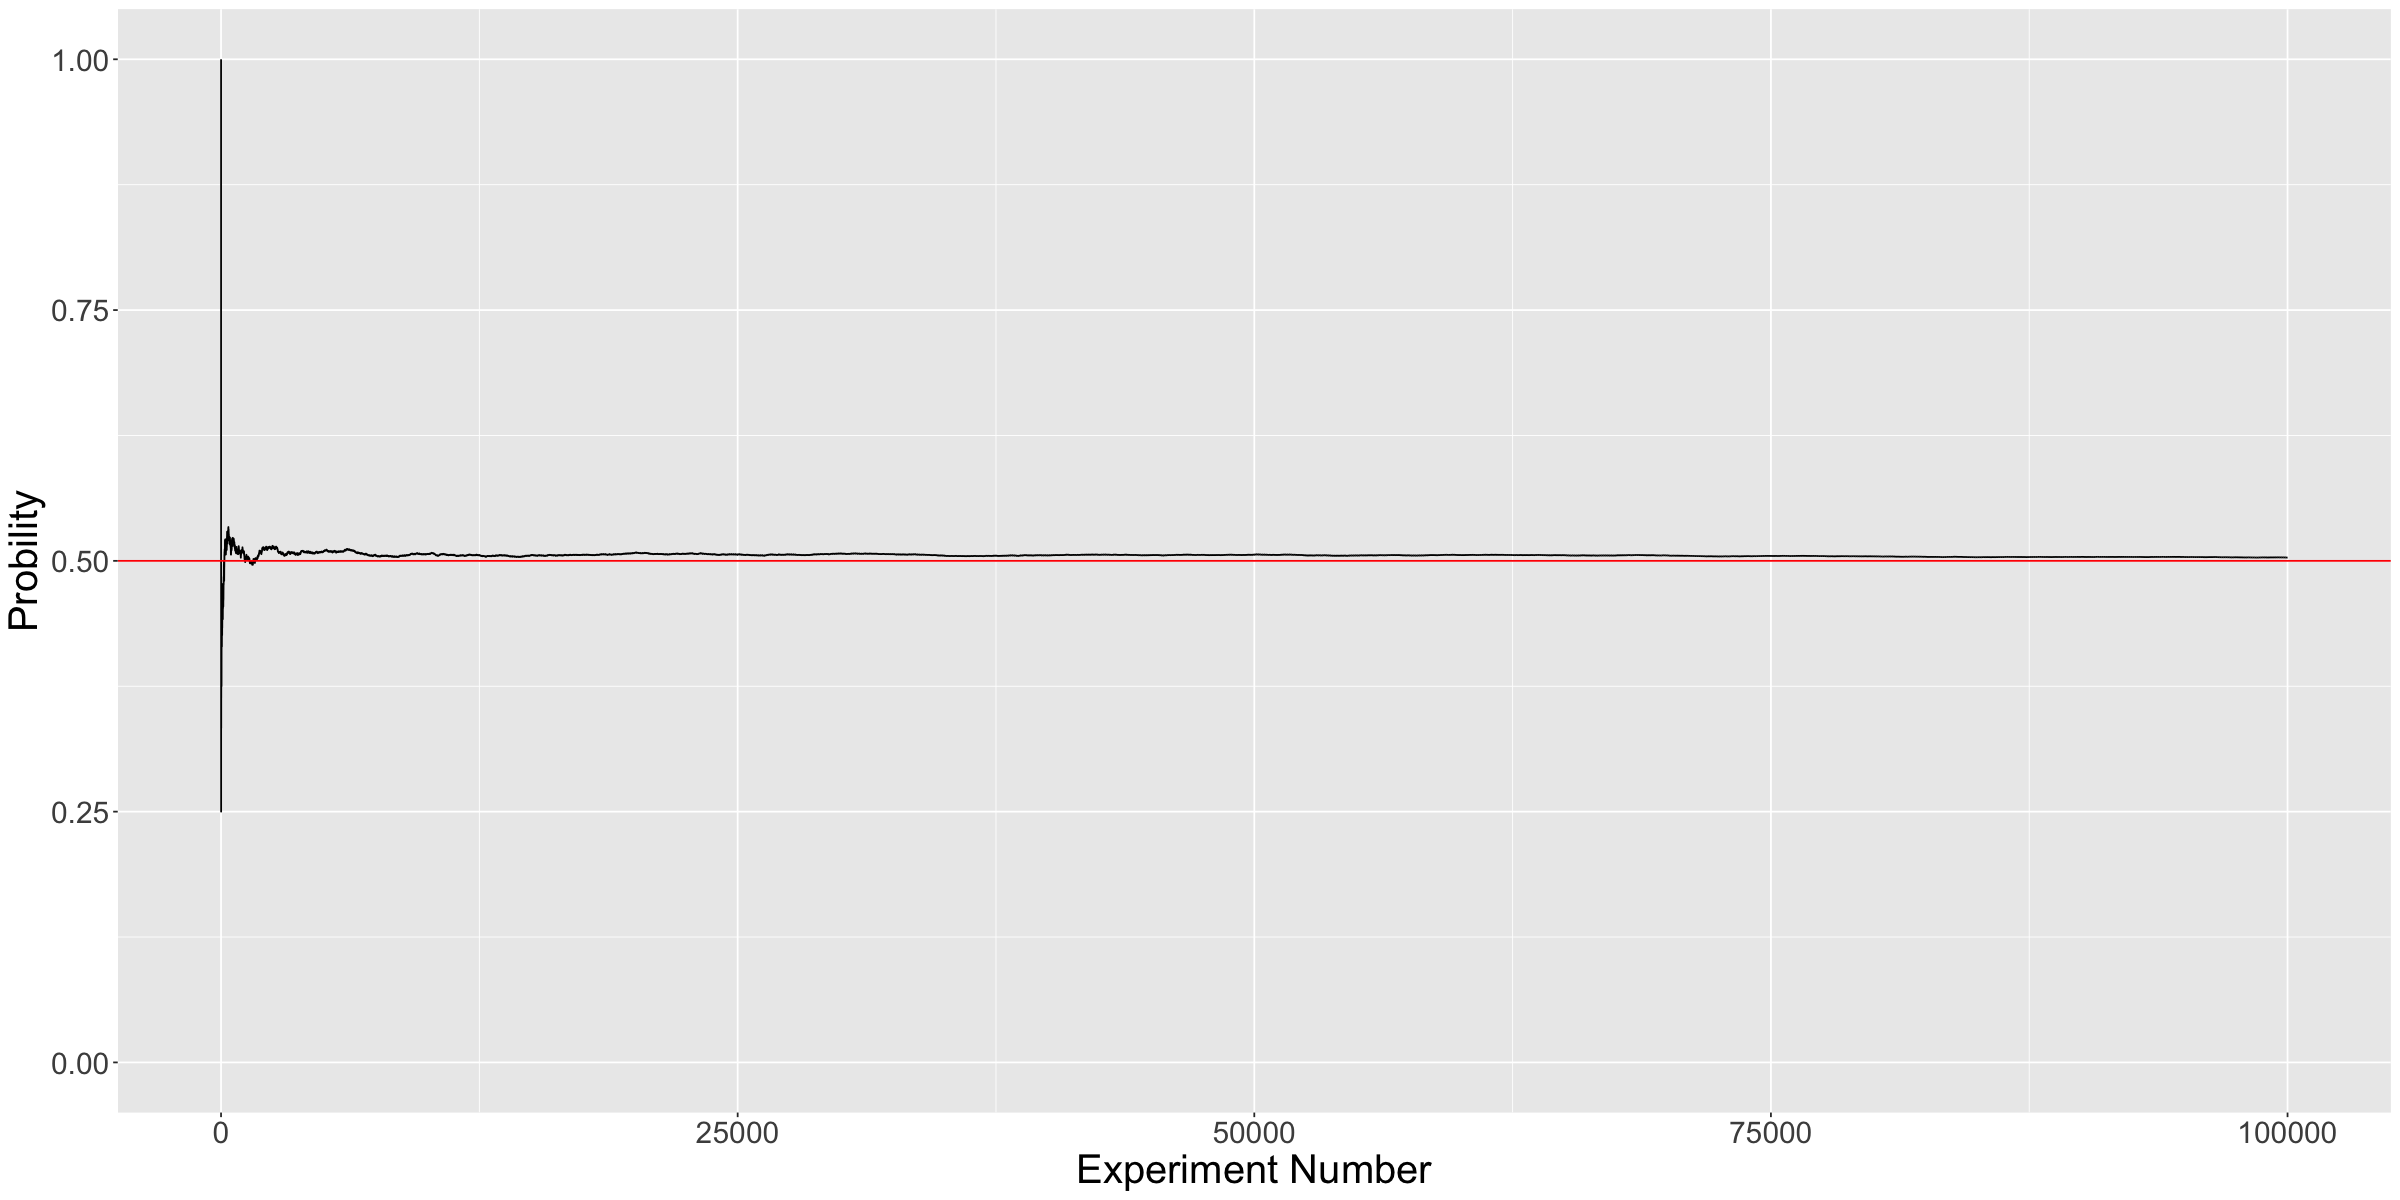

In [10]:
options(repr.plot.width = 20, repr.plot.height = 10)


ggplot()+
 geom_line(aes(x=1:100000, y=coin_flips_c_sum_norm)) + 
 geom_hline(yintercept = 0.5, color="red")+
 ylim(0, 1) + 
 theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
 theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) +  
 labs(x = "Experiment Number", y="Probility")
 

### Probability versus Statistic


* Probability deals with predicting the likelihood of future events

* A statistic analyzes the frequency of past events


![](https://www.dropbox.com/s/vwpni95sgr8rsdw/proba_stats_1.png?dl=1)

### Probability Models

- A way to reason about a probabilistic system. 

- We are mostly interested in:
  - Calculate the expectation of an event we repeat an experiment a large number of times
    - What is the number of fish I should expect to see in my quadrat today
  - Determine the amount of variability you should expect to see in the system
    - How variable is the number of fish I should expect to see in my quadrat today between 9AM and 2PM
  - Compute probability of events
    - What is the probability of seeing more than 252 fish in my quadrat today between 9AM and 2PM

- At the heart of probability models are **probability distributions** and **random variables**


### Probability Distributions

- Consider the loaded die with the following probabilities:
    p(1) = 0.3/6
    p(2) = 0.7/6
    p(3) =   2/6
    p(4) = 0.5/6
    p(5) = 0.2/6
    p(6) = 2.3/6

    
- We could think of outcomes above as the values returned by function that takes as input a value of either $(1,2,3,4,5,6)$ and returns a probability $[0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6]$

- Example:
```R
    loaded_die_distribution = function(number):
        dist = {1:0.3/6, 2:0.7/6, 3:2/6, 4:0.5/6, 5:0.2/6, 6:2.3/6}
        return dist[number]
```


In [1]:
loaded_die_distribution = function(number){
    dist = c(0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6)
    dist[number]
}

loaded_die_distribution(1)
loaded_die_distribution(2)

[1] 0.05

[1] 0.1166667

In [26]:
mapply(loaded_die_distribution, 1:6)

[1] 0.05000000 0.11666667 0.33333333 0.08333333 0.03333333 0.38333333

In [27]:
sum(mapply(loaded_die_distribution, 1:6))

[1] 1

### Probability Distributions - cont'd 

- The function we just implemented is a probability distribution
- In essence, a probability distribution is a numerical function that assigns probabilities (y-axis in [0-1]) to events in the sample space S (x-axis)

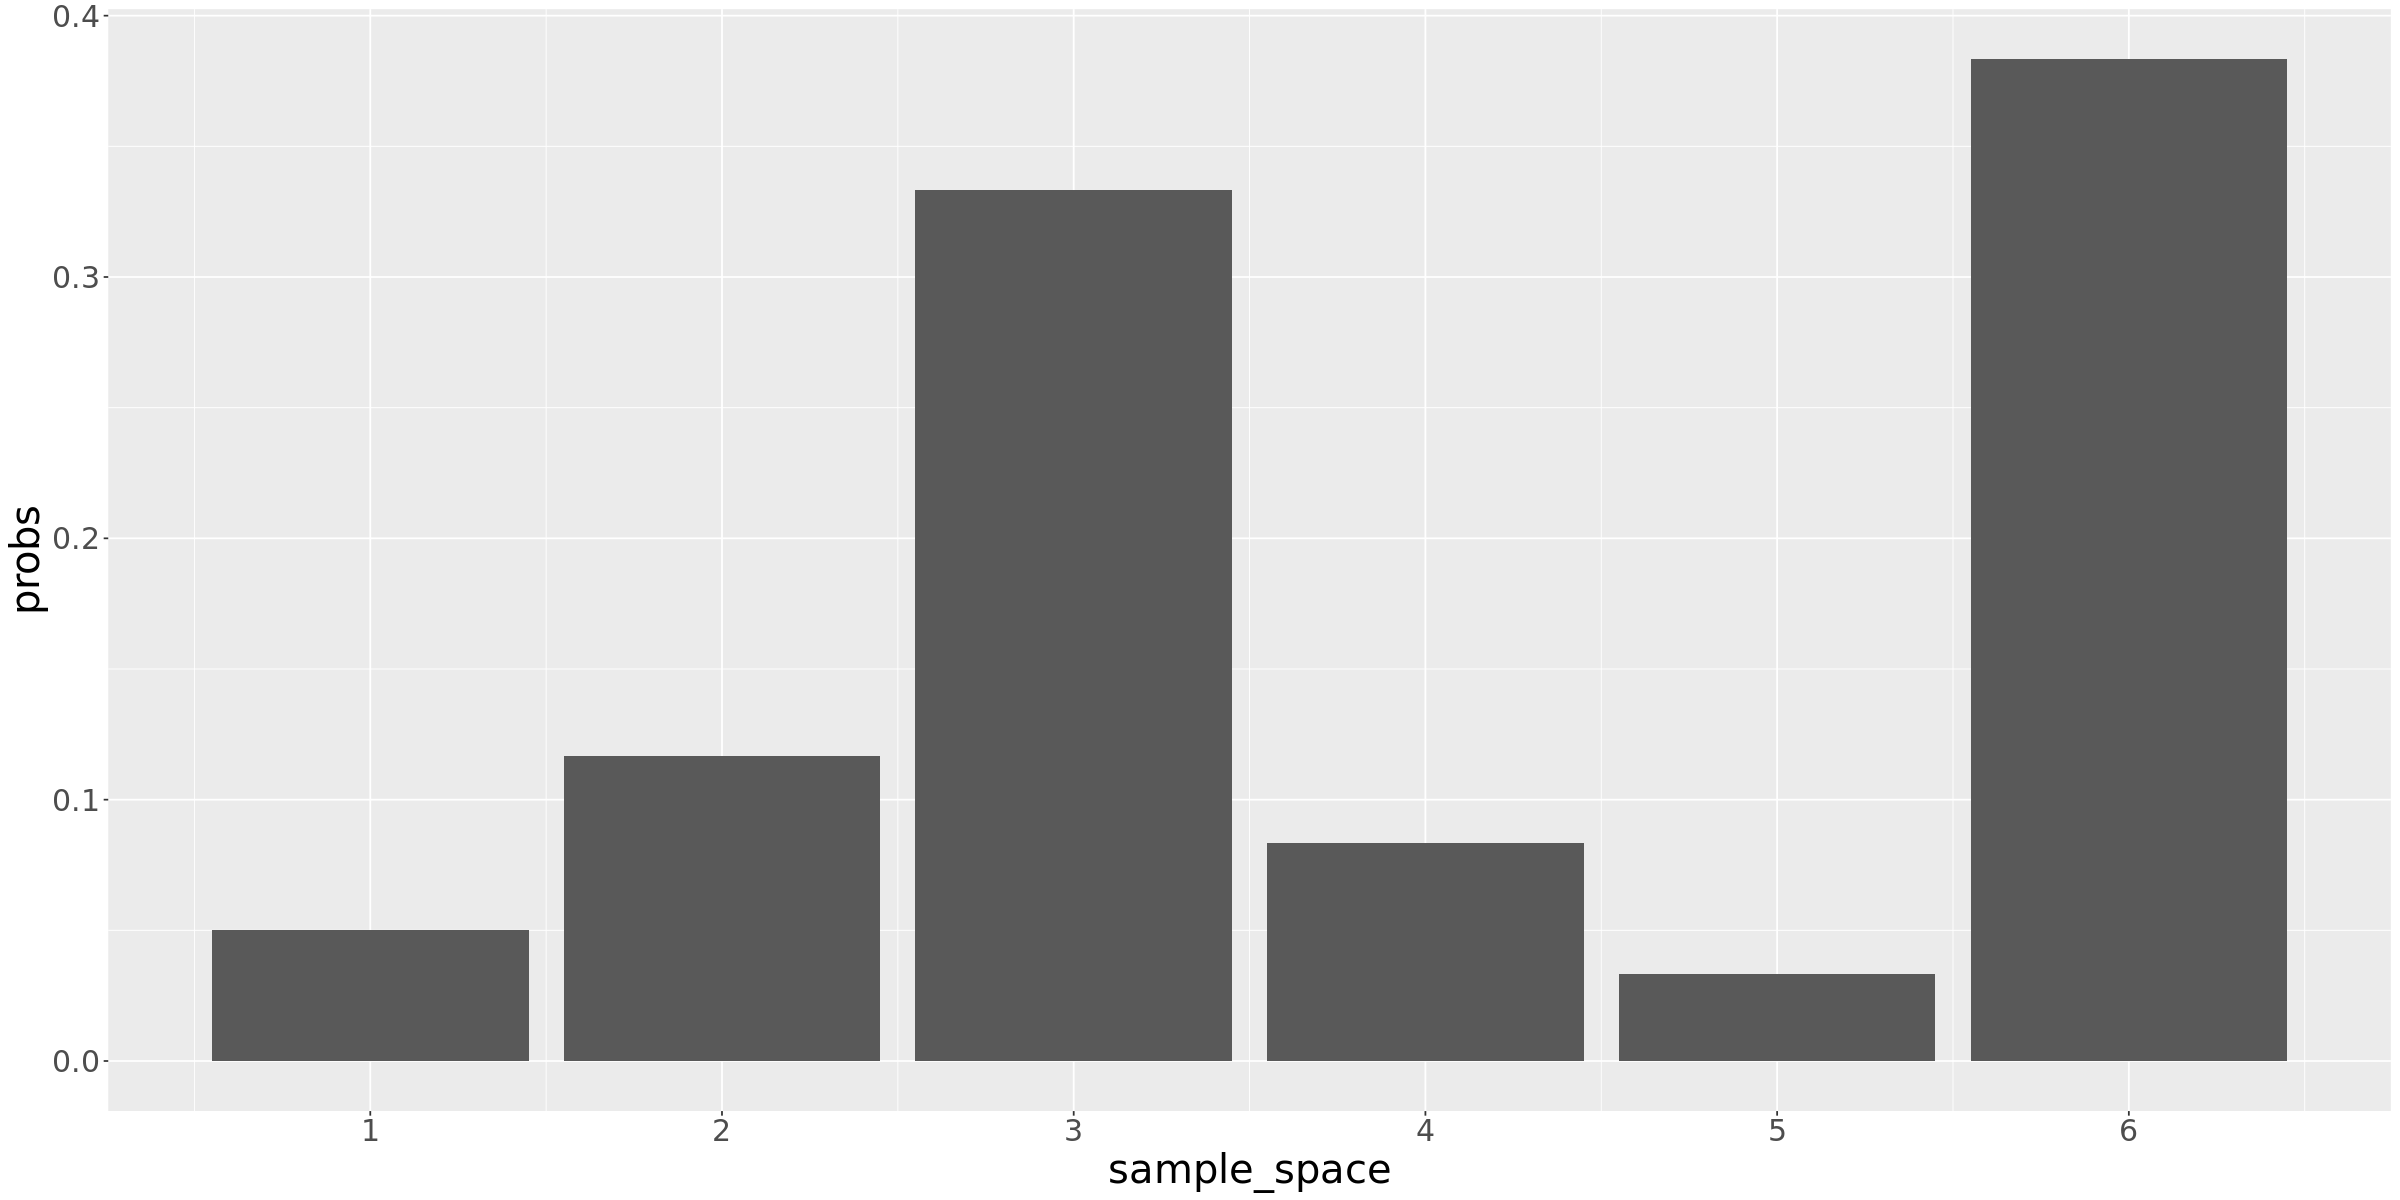

In [55]:
sample_space = 1:6
probs = c(0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6)

ggplot() + 
  geom_bar(aes(x=sample_space, y=probs), stat = "identity") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) + 
  scale_x_continuous(breaks=1:6, labels=1:6)
  


### Random Variables

- Merely a variable (a box for a value) that can take values that are variable (random)

    - In probabilistic thinking, a random variable is a variable that can take any value from the sample space of the experiment as determined by the probability distribution.
    
      - I.e., the value assigned to the variable depends on a random process
      
      
* The variable `roll_random_var` which can take a roll value according to some probability distribution


In [5]:
sample(c(1, 2, 3, 4, 5, 6), size = 1, prob=c(0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6))

[1] 2

In [9]:
sample(c(0, 1), size = 50, replace=TRUE, prob=c(0.95, 0.05))


[1] 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 1

In [40]:
roll_random_var = sample(c(1, 2, 3, 4, 5, 6), size = 1, prob=c(0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6))
cat("roll_random_var contains the value: ", roll_random_var)


roll_random_var contains the value:  4

### Probability Distributions - Continued

* Two types of random variables:
  * Discrete
  * Continuous (uncountably infinite)
    
* Both discrete and continuous random variables have commonly occurring distributions
  * Perhaps two of the most popular distributions are the binomial and the normal (or Gaussian)

### The Binomial Distribution

* The binomial models the number of successes in an experiment of $n$ fixed, independent trials
* Each trial has a probability of success $p$ and a probability of failure $1-p$ (heads and tails; 0 and 1; etc...)

* Ex.
  * Given a disease prevalence of $p=0.05$, what is the probability of observing the disease in at least 100 corals if we survey 5000 randomly selected corals around Honolulu?
  * Equivalent to: given a biased coin (head occurs with p=0.05), what is the probability of flipping at least 100 heads if we flip the coin 5000?
 
* fairly easy to derive the probs from first principles but since we have `R`, we can easily compute these probabilities


### Probability distributions for discrete random variables

- A probability distribution for a discrete random variable is called probability mass function (`pmf`)  
 - `pmf`s take a discrete random variables $X$ and assign a probability to each value of its sample space


- Popular `pmf`s such that of the binomial are typically included in most popular programming languages and data analysis software

- For instance, we can quickly compute the probabilities for all the values in the sample space of a binomial experiment with $n = 10$,  $p(H) = 0.3$ using R
  * Sample space size is 11 (0 heads, 1 head, 2 heads ... 10 heads)

- The common graphical representation for a `pmf` is a histogram
- X-axis contains observed values
- Y-axis contains probability for the corresponding X-values


In [45]:
# With 10 coing flips, prob head of head is 0.3.
# What is the prob of observing 4 heads

dbinom(4, size=10, prob=0.3) 

[1] 0.2001209

In [59]:
x_vals = 0:10
probs = mapply(dbinom, x_vals, size=10, prob=0.3)
probs
sum(probs)



[1] 0.0282475249 0.1210608210 0.2334744405 0.2668279320 0.2001209490
 [6] 0.1029193452 0.0367569090 0.0090016920 0.0014467005 0.0001377810
[11] 0.0000059049

[1] 1

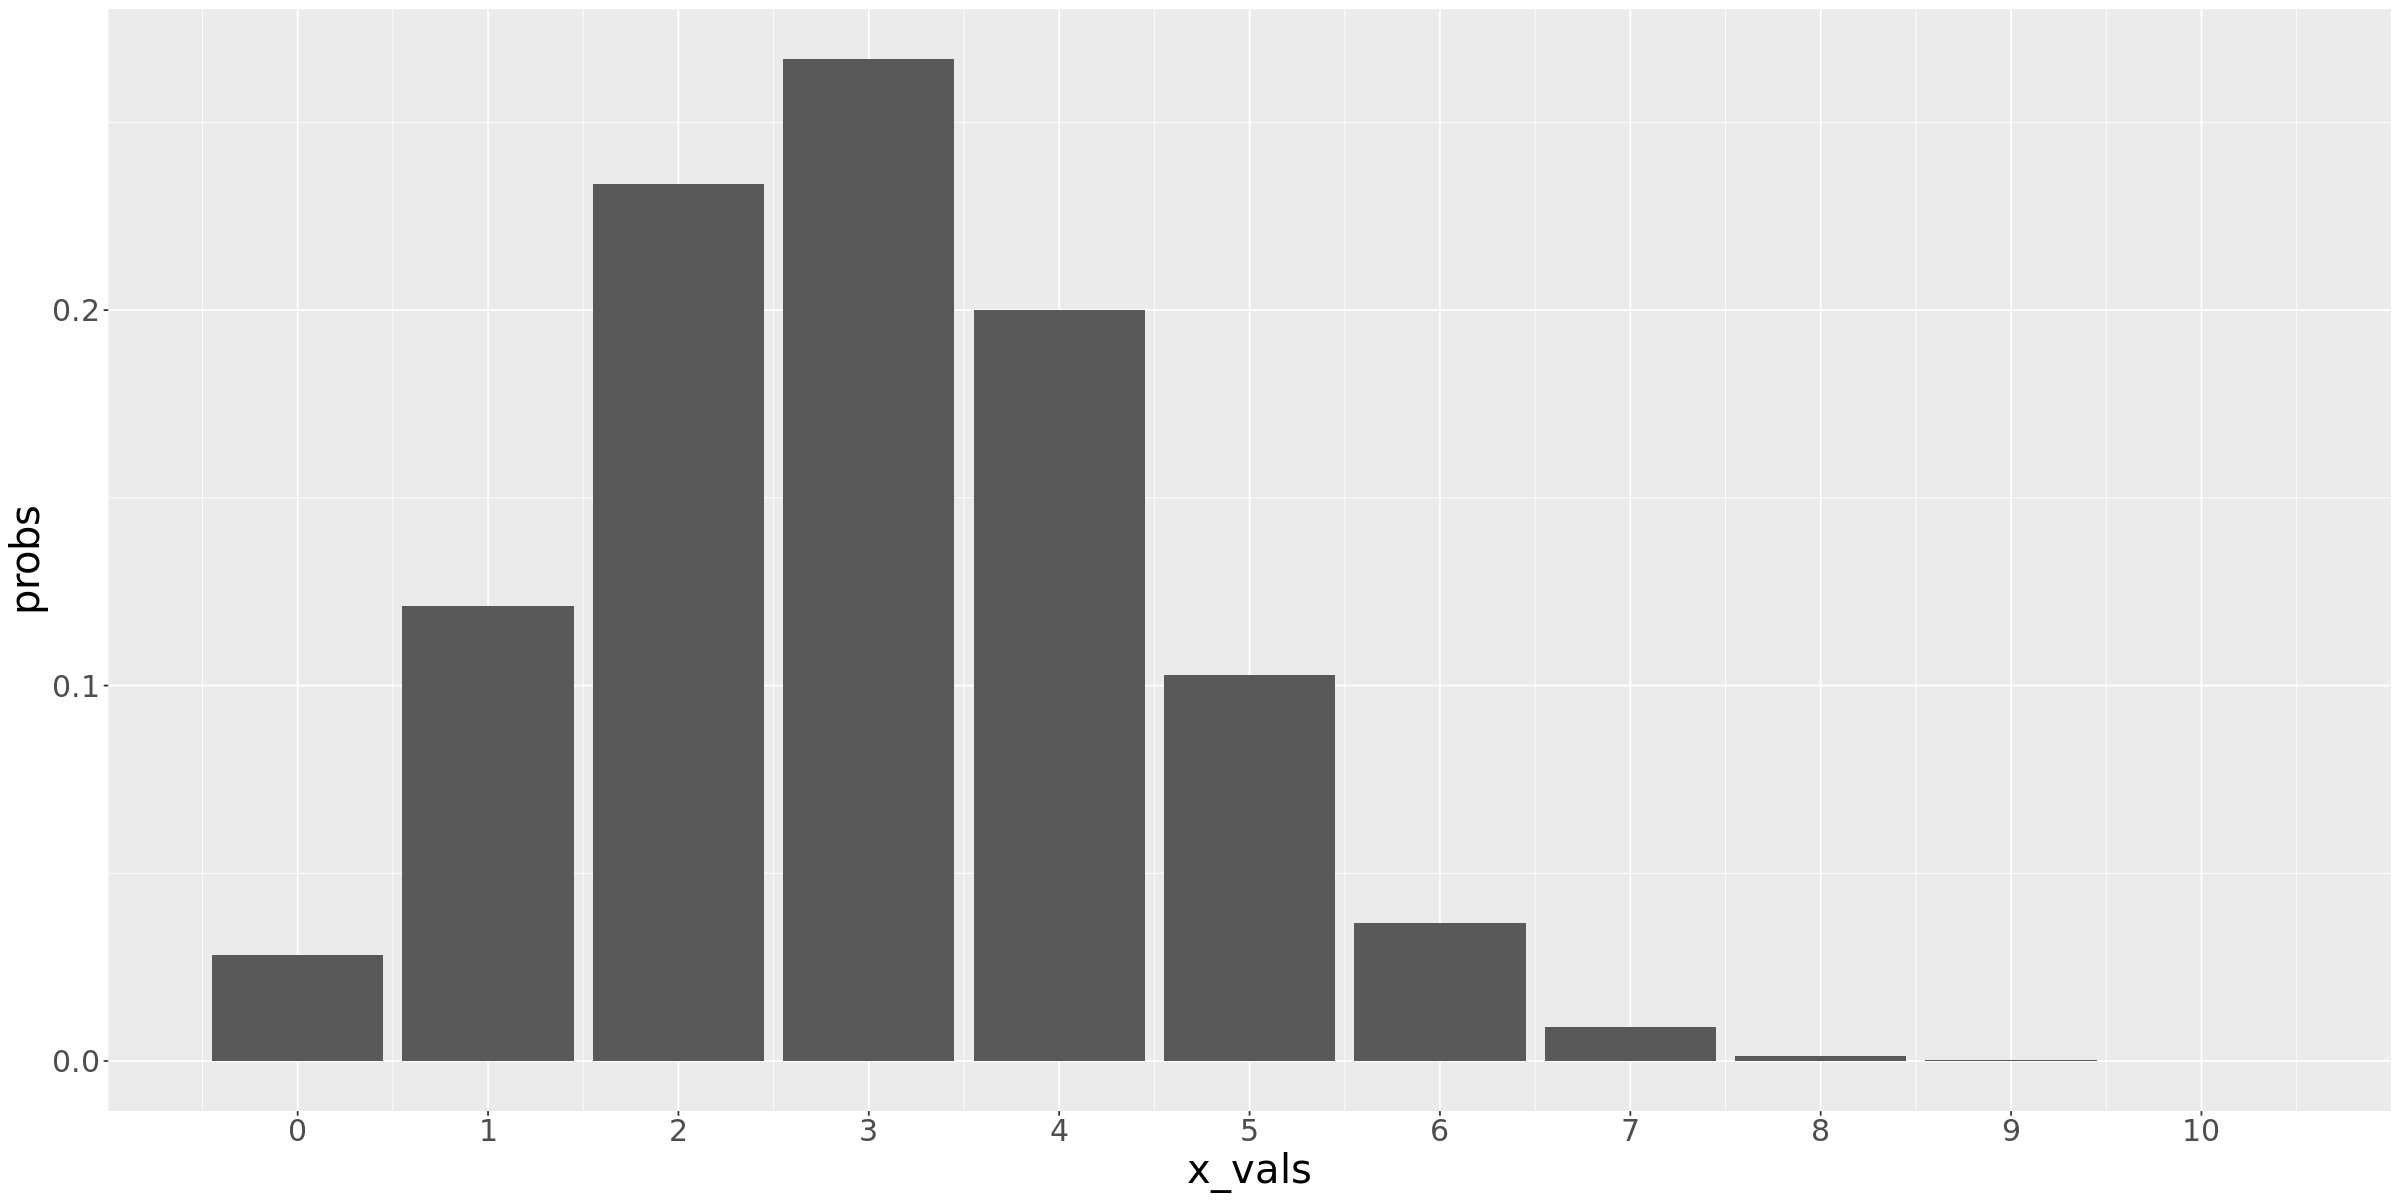

In [58]:

ggplot() + 
  geom_bar(aes(x=x_vals, y=probs), stat = "identity") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) + 
  scale_x_continuous(breaks=0:10, labels=0:10)
  


### Binomial Distributions Parameters

- Binomial distributions parameterized with different values of $n$ and $p$ will produce different `pmf`s

  * The following two distributions are different $n_1=9$ and $p_1=0.43$ and $n_2=11$ and $p_2=0.43$
  * The following two distributions are different $n_1=9$ and $p_1=0.45$ and $n_2=9$ and $p_2=0.45$   

- As such, when describing a pmf, it is important to describe its `parameters`
  - Modifying these parameters results in different probability distributions
  

In [23]:
library(ggplot2)
library(gridExtra)

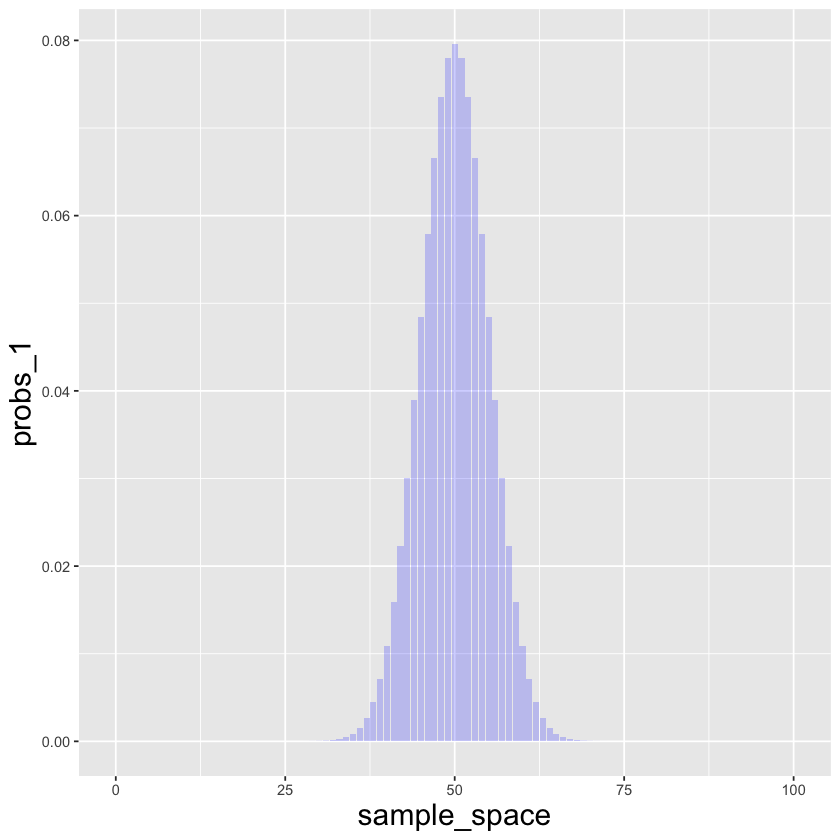

In [31]:
sample_space = 0:100
probs_1 = mapply(dbinom, sample_space, size=100, prob=0.5)

ggplot() + 
  geom_bar(aes(x=sample_space, y=probs_1), stat = "identity", alpha=0.2, fill="blue") +
  theme(axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18))



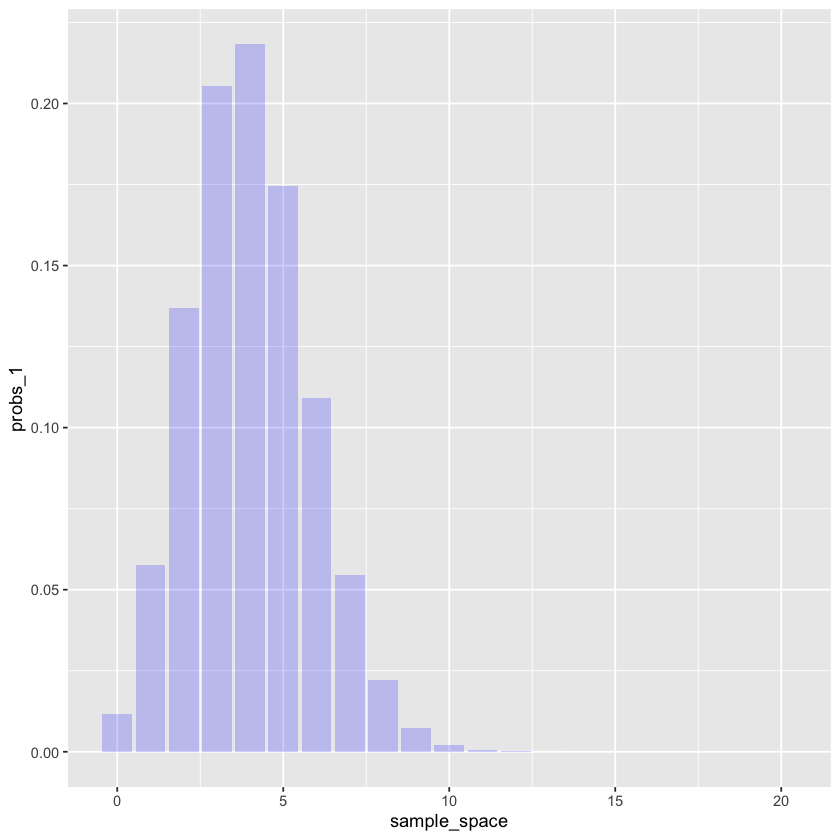

In [36]:
sample_space = 0:20
probs_1 = mapply(dbinom, sample_space, size=20, prob=0.2)

ggplot() + 
  geom_bar(aes(x=sample_space, y=probs_1), stat = "identity", alpha=0.2, fill="blue")



In [26]:
x_vals_1 = seq(0, 9, 2)
x_vals_1 = seq(0, 9, 2)
probs_1 = mapply(dbinom, x_vals_1, size=9, prob=0.43)
probs_2 = mapply(dbinom, x_vals_1, size=11, prob=0.3)


plt_1 <- ggplot() + 
  geom_bar(aes(x=x_vals_1, y=probs_1), stat = "identity", alpha=0.2, fill="blue") +
  theme(axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18)) + 
  scale_x_continuous(breaks=0:10, labels=0:10)

plt_2 <- ggplot() + 
  geom_bar(aes(x=x_vals_1, y=probs_2), stat = "identity", alpha=0.2, fill="red") +
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) + 
  scale_x_continuous(breaks=0:10, labels=0:10)


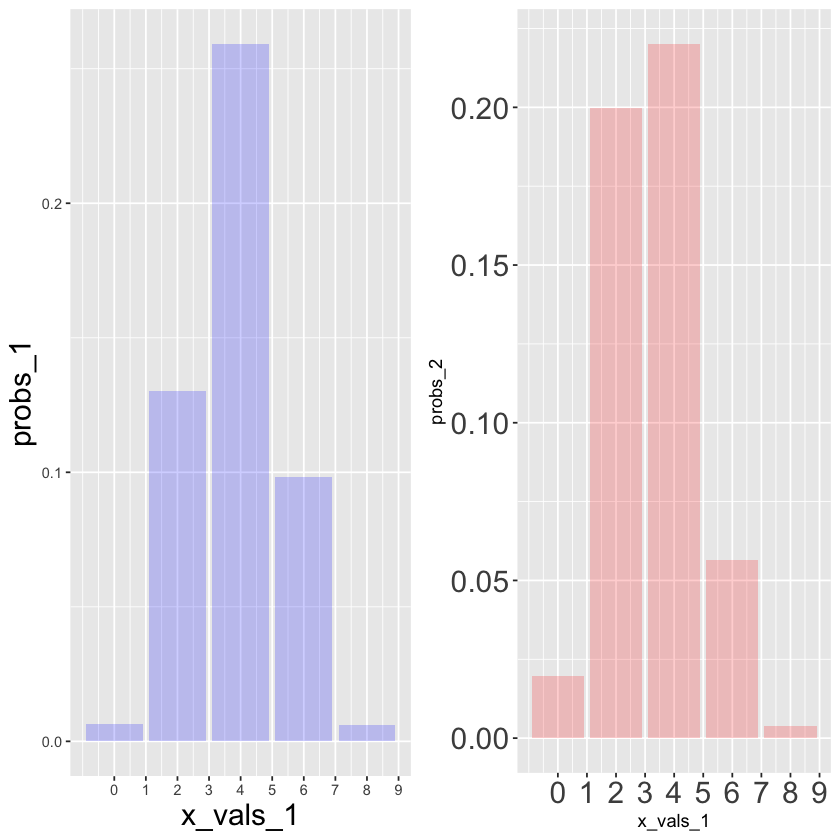

In [27]:
grid.arrange(plt_1, plt_2, ncol=2)

### Summary: `X`, `n`, `p` and the `pmf`

- The number of observed successes is said to be a random variable $X$, distributed as a binomial distribution.

- We write the above statement as:
$$
X \sim Binomial(n,p)
$$

- This simply means that:

  - The random variable $X$ takes on values in the sample space
    - The sample space here is in the range $0$ to $n$
  - The parameters of the Binomial probability distributions are $n$, $p$

### Normal Distribution


- The `normal` or `Gaussian` distribution is a continuous probability distribution.

- Numerous real-world phenomena can be modeled, or *at least approximated* using normal distributions.
- Some examples:
  - The heights of males in a population
  - Errors in instrumentation
  - Errors in instrumentation  
    
- Many statistical tests assume distributions of your data are normal



In [80]:
length(x_val)

[1] 121

In [38]:
x_vals = seq(-3, 3, 0.05)
x_vals


[1] -3.00 -2.95 -2.90 -2.85 -2.80 -2.75 -2.70 -2.65 -2.60 -2.55 -2.50 -2.45
 [13] -2.40 -2.35 -2.30 -2.25 -2.20 -2.15 -2.10 -2.05 -2.00 -1.95 -1.90 -1.85
 [25] -1.80 -1.75 -1.70 -1.65 -1.60 -1.55 -1.50 -1.45 -1.40 -1.35 -1.30 -1.25
 [37] -1.20 -1.15 -1.10 -1.05 -1.00 -0.95 -0.90 -0.85 -0.80 -0.75 -0.70 -0.65
 [49] -0.60 -0.55 -0.50 -0.45 -0.40 -0.35 -0.30 -0.25 -0.20 -0.15 -0.10 -0.05
 [61]  0.00  0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  0.55
 [73]  0.60  0.65  0.70  0.75  0.80  0.85  0.90  0.95  1.00  1.05  1.10  1.15
 [85]  1.20  1.25  1.30  1.35  1.40  1.45  1.50  1.55  1.60  1.65  1.70  1.75
 [97]  1.80  1.85  1.90  1.95  2.00  2.05  2.10  2.15  2.20  2.25  2.30  2.35
[109]  2.40  2.45  2.50  2.55  2.60  2.65  2.70  2.75  2.80  2.85  2.90  2.95
[121]  3.00

In [43]:
x_vals

[1] -3.00 -2.75 -2.50 -2.25 -2.00 -1.75 -1.50 -1.25 -1.00 -0.75 -0.50 -0.25
[13]  0.00  0.25  0.50  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  2.75
[25]  3.00

In [46]:
sum(probs)

[1] 3.993082

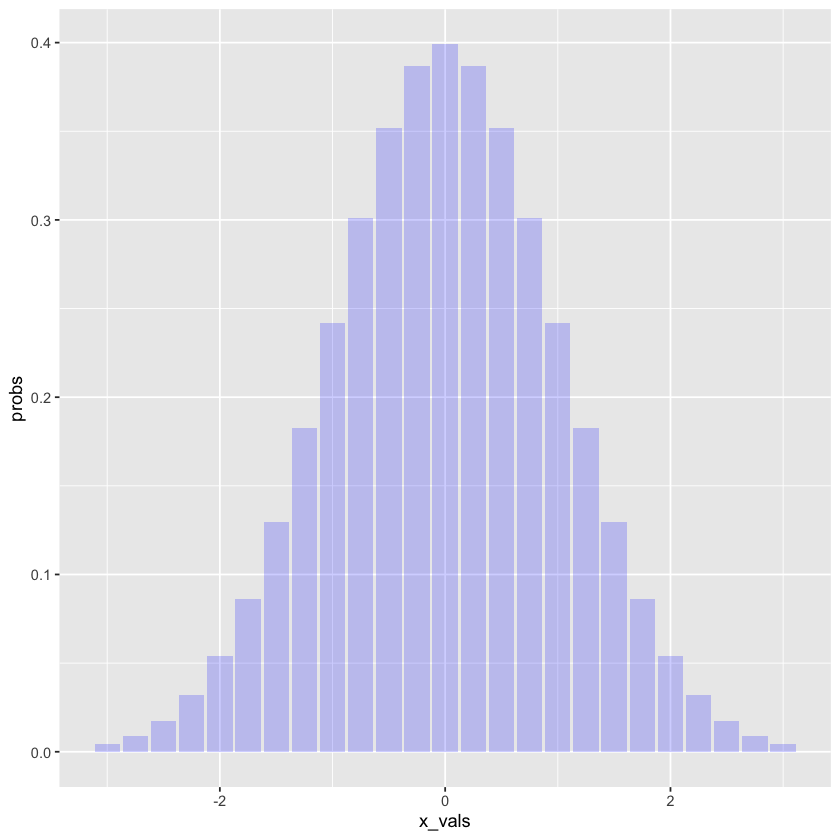

In [42]:
x_vals = seq(-3, 3, 0.25)
probs =mapply(dnorm, x_vals, mean = 0, sd = 1)

ggplot() + 
geom_bar(aes(x=x_vals, y=probs), stat = "identity", alpha=0.2, fill="blue")

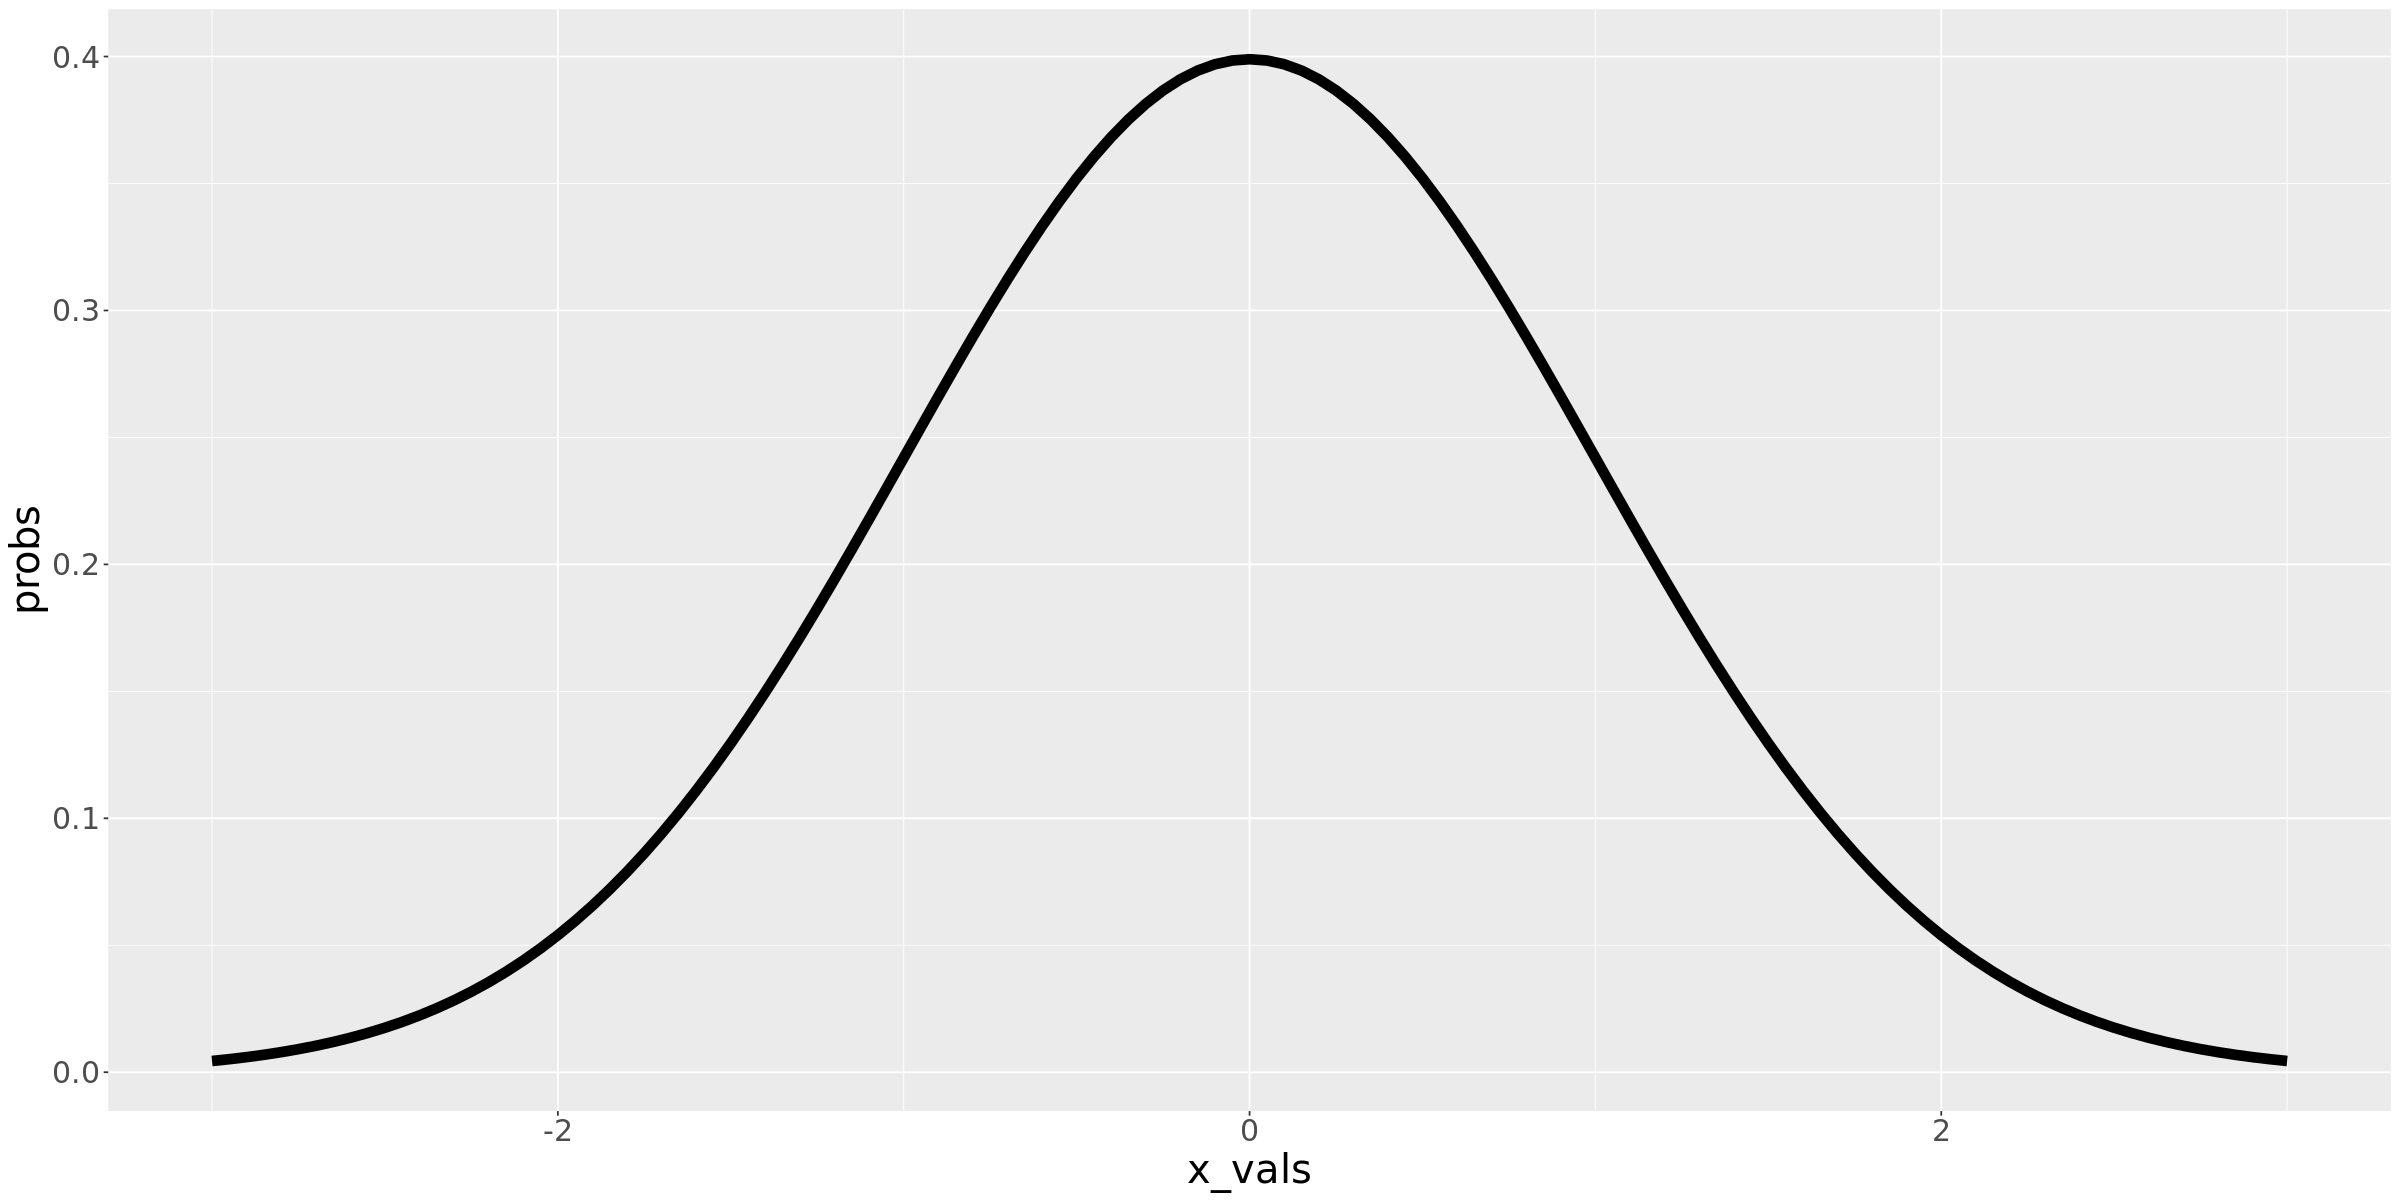

In [83]:
x_vals = seq(-3, 3, 0.05)
probs =mapply(dnorm, x_val, mean = 0, sd = 1)


ggplot() + 
  geom_line(aes(x=x_vals, y=probs), size=3) +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) 



### Properties of the Normal Distribution - Cont'd

- The `parameters` for a Normal are its center location (mean) and spread (standard deviation)
  - $\mu$  is the mean; it governs where the middle of the distribution lies on the $x$-axis
  - $\sigma$  is the standard deviation; determines how wide the bell is and can also be referred to as the scale

- We write a random variable distributed according to a Normal with paramters $\mu$ and $\sigma$ as:

$$
X \sim \mathcal{N} (\mu,\sigma)
$$

- For continuous distributions, the probability distribution is typically represented as a continuous curve
  - As opposed to the discrete distribution, the continuous can usually take values in all the range

- A first distribution with the paramters ($\mu = 0 $, $\sigma = 1$) and a second distribution with the paramters ($\mu = 2 $, $\sigma = 3$) have different shapes and tell different stories

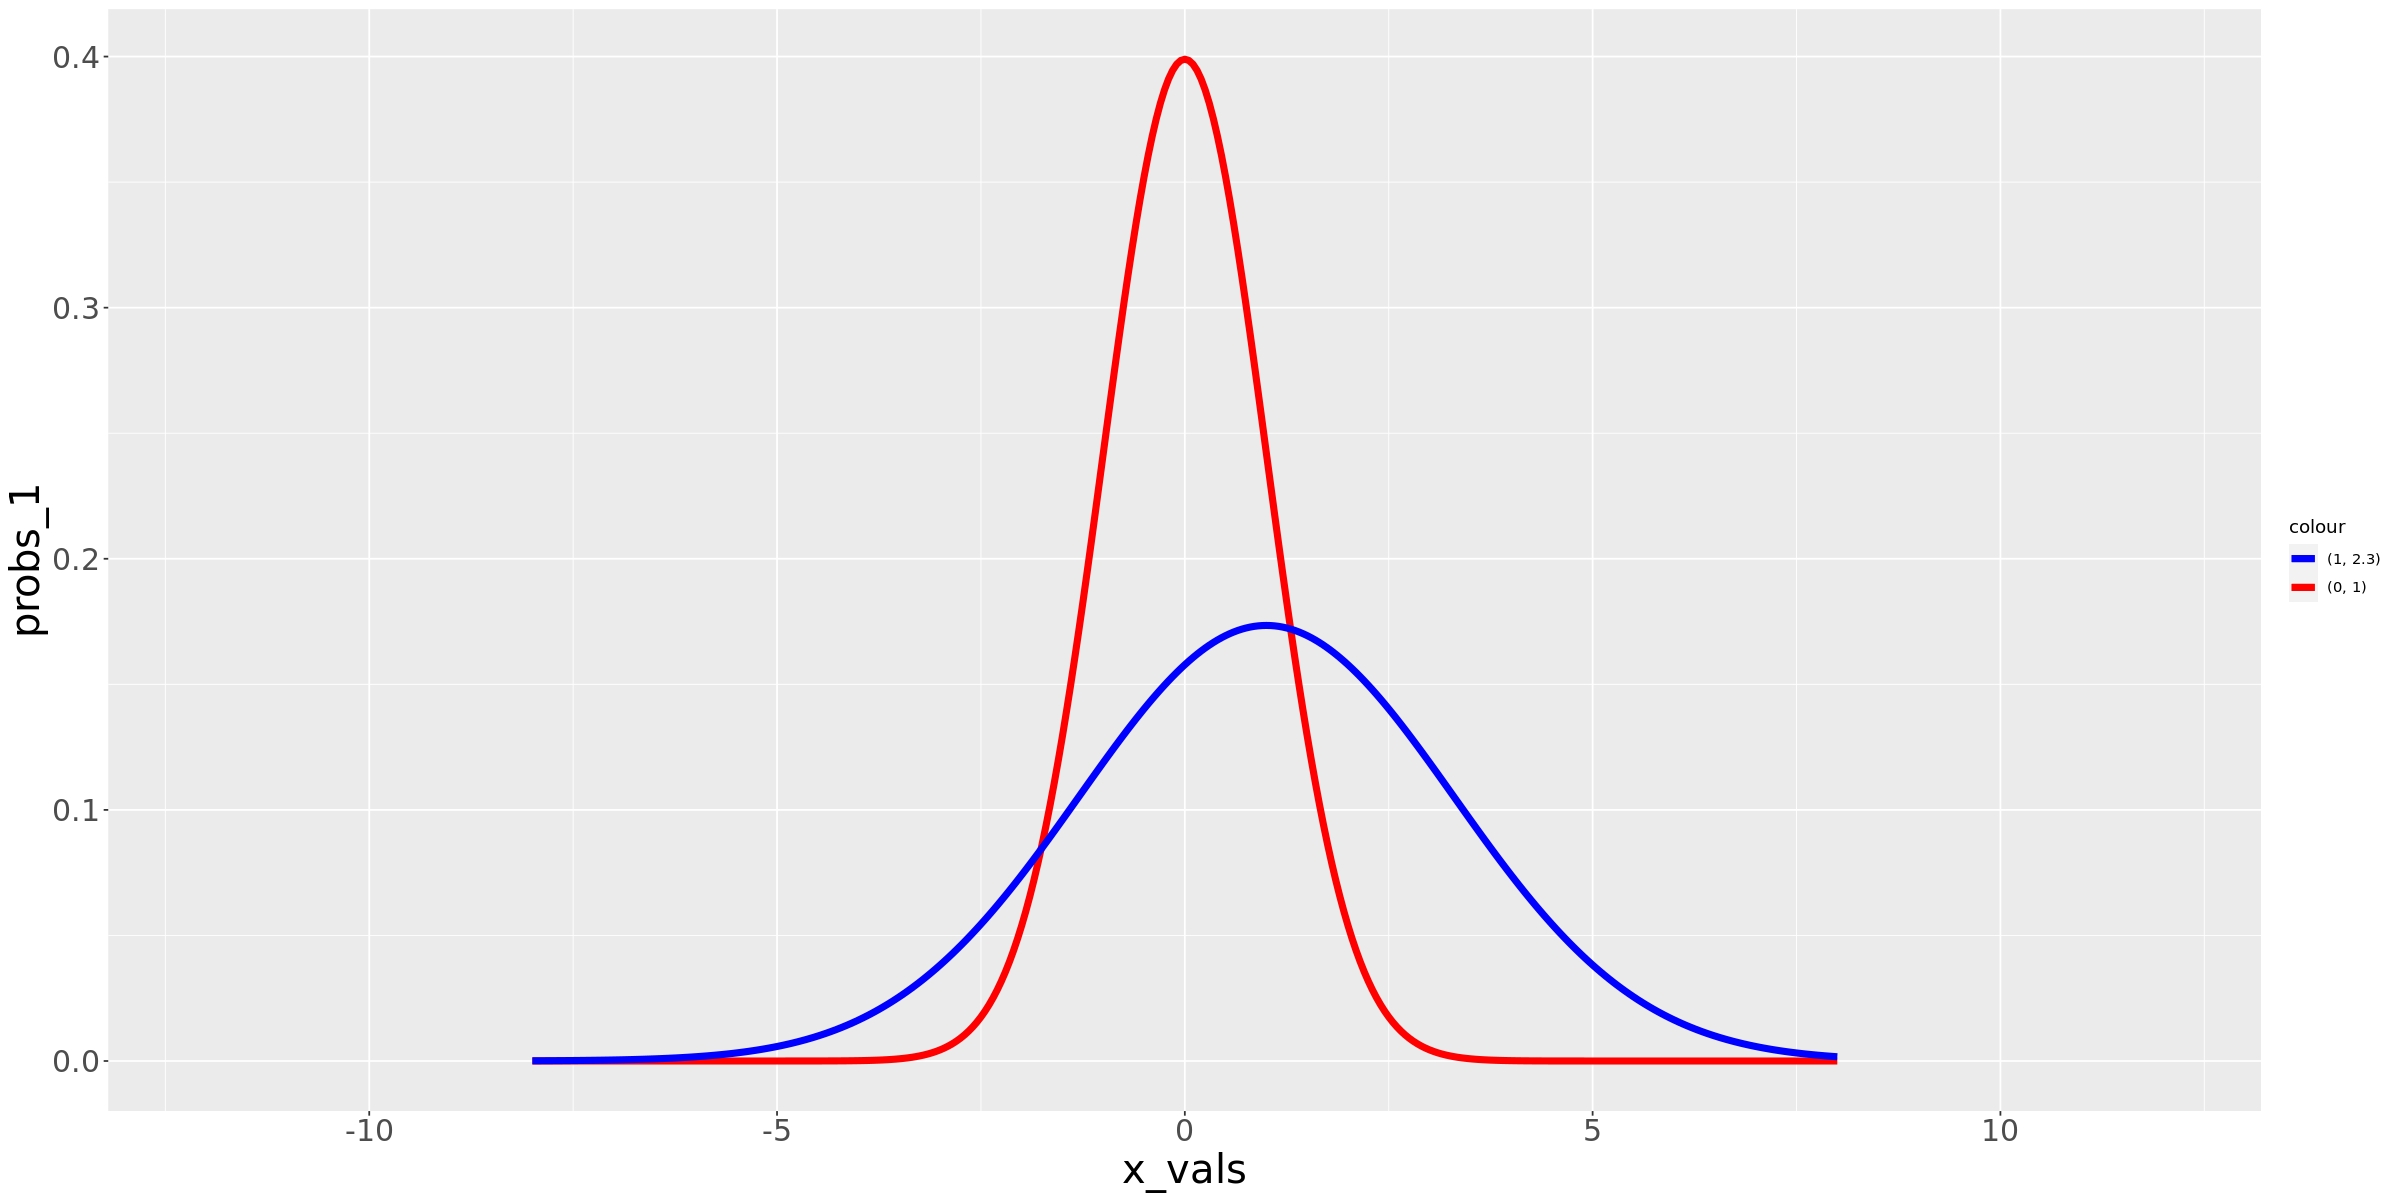

In [105]:

x_vals = seq(-8, 8, 0.05)
probs_1 = mapply(dnorm, x_vals, mean = 0, sd = 1)
probs_2 = mapply(dnorm, x_vals, mean = 1, sd = 2.3)


ggplot() + 
  geom_line(aes(x=x_vals, y=probs_1, color = "red"), size=2) +
  geom_line(aes(x=x_vals, y=probs_2, color = "blue"), size=2) +
  xlim(-12,12)+
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) + 
  scale_color_manual(labels = c("(1, 2.3)", "(0, 1)"), values = c("blue", "red"))

### Properties of the Normal Distribution

- The probability density function for a random variable $X \sim \mathcal{N} (\mu,\sigma)$ is:
  - The notation here is similar to that in the binomial 


$$ 
    p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-u)^2}{2\sigma^2}}
$$


- Since the sample space is uncountably infinite, the probability of each event is ~0
- Therefore, instead of the `pmf`, continuous random variables have a `pdf`



### `pdf` versus `pmf`

- A `pdf` is conceptually similar to a `pmf`, but instead of giving you a probability, it tells you the density around a particular point. 
  - You can think of it as mass (as in `pmf`) normalized by a small area  
    - ex. in the  $x \sim \mathcal{N}(0, 1)$ probability density around $0$ is much higher than the density around $-2.5$
- Since $X$ is continuous, the `pdf` is also continuous
- The total area under the `pdf` curve sums to 1




#### Data in The Gaussian Distribution

- In the normal distribution, the area with the highest density lies close to the mean
  - When we sample from a normal, the bulk of the observations generated from a normal distribution lies near the mean

![](https://www.dropbox.com/s/ra94g1mtn5b1cpy/gaussian_and_var.png?dl=1)

### Density and Sampling

* To illustrate the idea that dense regions contribute more random samples, we sample $1000$ values from a standard normal distribution $\mathcal{N}(\mu=0, \sigma=1)$

In [50]:
rnorm(1, mean=0, sd=1)

[1] -0.8733973

In [51]:
gaussian_samples = rnorm(5000, mean=0, sd=1)
gaussian_samples[0:10]

[1] -1.4992209 -0.6102304 -0.9073540 -1.8282178  0.8739468  0.5787876
 [7]  0.2260579  2.8028074  0.3411774  1.2403006

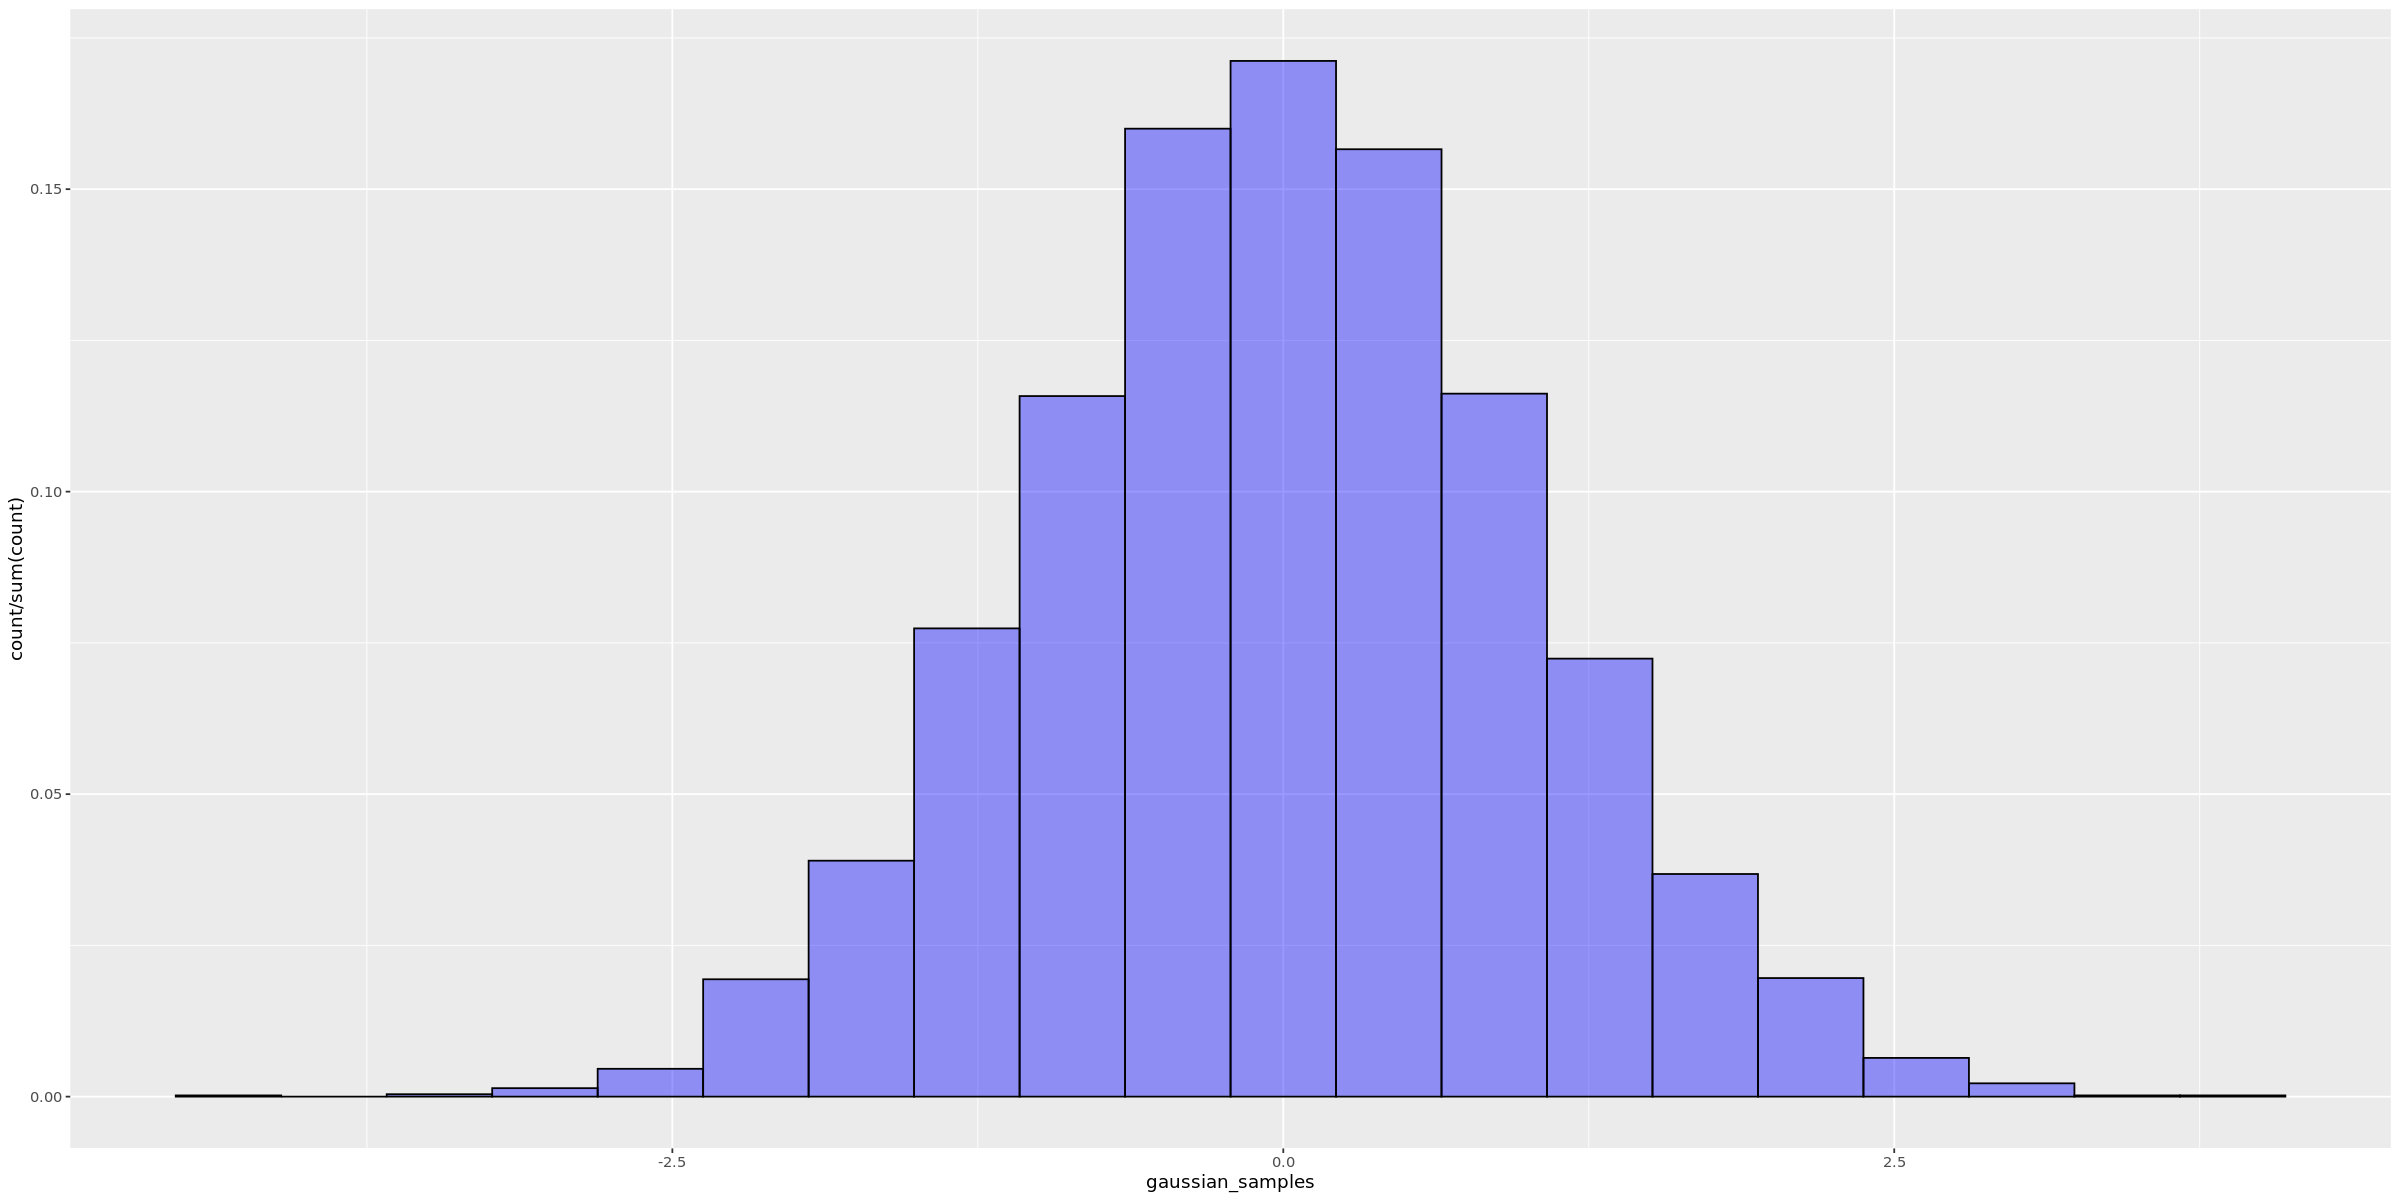

In [140]:

ggplot()+
  geom_histogram(aes(x=gaussian_samples, y=stat(count/sum(count))), bins = 20, alpha=0.4, fill="blue", color="black") 
  
